## Importando os dados do dataset

In [104]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report

In [105]:
df = pd.read_csv('../dataset/TelecomX_Data_Normalized.csv')
df.head(1)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,No,Female,No,Yes,Yes,9,Yes,DSL,One year,Mailed check,65.6,593.3,2.19


## Normalização, padronização e OneHotEncoder

In [106]:
## mudando colunas com apenas dois valores para binário = Churn customer.gender 
# customer.SeniorCitizen customer.Partner customer.Dependents customer.PhoneService
col_bin = ['Churn', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService']
df[col_bin] = df[col_bin].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# customer.gender tratativa sozinho pois os valores são diferentes de sim e não
df['customer.gender'] = df['customer.gender'].map({'Female': 0, 'Male': 1})

df.head(1)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,internet.InternetService,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0,0,0,1,1,9,1,DSL,One year,Mailed check,65.6,593.3,2.19


In [107]:
# Verificando os valores únicos das colunas binárias
for col in col_bin:
    print(f"{col}: {df[col].unique()}")

Churn: [0 1]
customer.SeniorCitizen: [0 1]
customer.Partner: [1 0]
customer.Dependents: [1 0]
phone.PhoneService: [1 0]


In [108]:
## utilizando oneHontEncoder para categorias com mais de duas categorias = internet.InternetService account.Contract 
# account.PaymentMethod 

col_cat = ['internet.InternetService', 'account.Contract', 'account.PaymentMethod']
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     col_cat),
     remainder='passthrough'
)

df = one_hot_enc.fit_transform(df)
df = pd.DataFrame(df, columns=one_hot_enc.get_feature_names_out())
df.head()


,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__account.Contract_Month-to-month,onehotencoder__account.Contract_One year,onehotencoder__account.Contract_Two year,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__Churn,remainder__customer.gender,remainder__customer.SeniorCitizen,remainder__customer.Partner,remainder__customer.Dependents,remainder__customer.tenure,remainder__phone.PhoneService,remainder__account.Charges.Monthly,remainder__account.Charges.Total,remainder__account.Charges.Daily
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9.0,1.0,65.6,593.30,2.19
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,1.0,59.9,542.40,2.00
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,73.9,280.85,2.46
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,13.0,1.0,98.0,1237.85,3.27
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,83.9,267.40,2.80


In [109]:
colunas = df.columns.tolist()
for col in colunas:
    print(f"{col}: {df[col].unique()}")
# apenas conferindo se os números estão corretamente tratados

onehotencoder__internet.InternetService_DSL: [1. 0.]
onehotencoder__internet.InternetService_Fiber optic: [0. 1.]
onehotencoder__internet.InternetService_No: [0. 1.]
onehotencoder__account.Contract_Month-to-month: [0. 1.]
onehotencoder__account.Contract_One year: [1. 0.]
onehotencoder__account.Contract_Two year: [0. 1.]
onehotencoder__account.PaymentMethod_Bank transfer (automatic): [0. 1.]
onehotencoder__account.PaymentMethod_Credit card (automatic): [0. 1.]
onehotencoder__account.PaymentMethod_Electronic check: [0. 1.]
onehotencoder__account.PaymentMethod_Mailed check: [1. 0.]
remainder__Churn: [0. 1.]
remainder__customer.gender: [0. 1.]
remainder__customer.SeniorCitizen: [0. 1.]
remainder__customer.Partner: [1. 0.]
remainder__customer.Dependents: [1. 0.]
remainder__customer.tenure: [ 9.  4. 13.  3. 71. 63.  7. 65. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 66. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39.
 40. 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 4

## Verificação da Proporção de Evasão

In [110]:
pd.DataFrame(df['remainder__Churn'].value_counts())
## percebe-se que há um desbalanceamento nas classes da variável alvo, pessoas que optaram pela evasão é muito menor

,count
remainder__Churn,
0.0,5174
1.0,1869


## Separação de dados em treino e teste

In [111]:
#separação dos dados com 70% para treino e 30% para teste
X = df.drop(columns=['remainder__Churn'])
y = df['remainder__Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y garante que a proporção de classes seja mantida no conjunto de treino e teste

## Balanceamento das classes - somente de treino

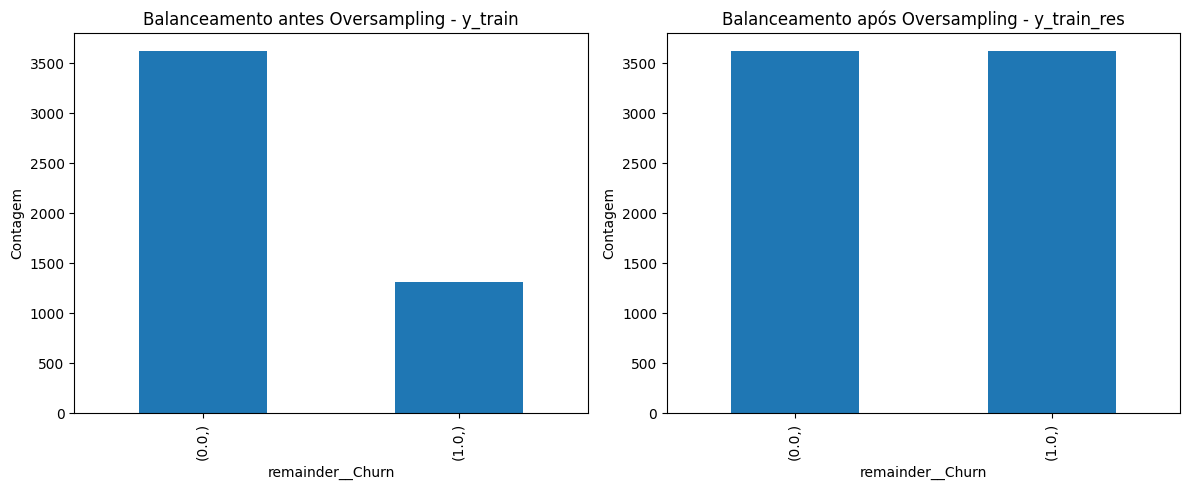

In [112]:
# dentre as opções de undersampling e oversampling, decidi utilizar o oversampling
# minha escolha foi baseada no fato de que o oversampling pode ajudar a identificar melhor a classe minoritária
# nesse caso o 1(sim) da variável alvo, que representa os clientes que optaram por cancelar o serviço
# também considerando que o dataset não é tão grande
# tentarei evitar overfitting com o uso do SMOTE

from imblearn.over_sampling import SMOTE as sm

sm = sm(random_state=42) #random state para reprodutibilidade
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Gráfico para y_train
pd.DataFrame(y_train).value_counts().plot(kind='bar', ax=axs[0], title='Balanceamento antes Oversampling - y_train')
axs[0].set_ylabel('Contagem')
# Gráfico para y_train_res
pd.DataFrame(y_train_res).value_counts().plot(kind='bar', ax=axs[1], title='Balanceamento após Oversampling - y_train_res')
axs[1].set_ylabel('Contagem')
plt.tight_layout()
plt.show()  #



## Análise de correlação

In [113]:
mc = df.corr()
mc = mc['remainder__Churn'].sort_values(ascending=False)
pd.DataFrame(mc)

# Positivo: Quando a variável X aumenta, o Churn tende a ser 1 (mais Churn).
# Negativo: Quando a variável X aumenta, o Churn tende a ser 0 (menos Churn).
# Quanto mais próximo de 1 ou -1: Mais forte a relação.
# Quanto mais próximo de 0: Mais fraca a relação linear.

,remainder__Churn
remainder__Churn,1.000000
onehotencoder__account.Contract_Month-to-month,0.405103
onehotencoder__internet.InternetService_Fiber optic,0.308020
onehotencoder__account.PaymentMethod_Electronic check,0.301919
remainder__account.Charges.Daily,0.193412
remainder__account.Charges.Monthly,0.193356
remainder__customer.SeniorCitizen,0.150889
remainder__phone.PhoneService,0.011942
remainder__customer.gender,-0.008612
onehotencoder__account.PaymentMethod_Mailed check,-0.091683


## Considerações principais da análise de correlação

-- corr Positivos, ou seja, quanto maior a variável maior a taxa de evasão (1) --
- clientes com contrato mensal possuem uma tendência maior de evasão. Contratos mensais não prendem cliente a longo prazo.
- clientes que contratam fibra óptica também estão mais inclinados a evasão. Pode indicar um problema na prestação do serviço.
- clientes que pagam eletronicamente estão mais inclinados a evasão, também pode indicar um roblema na prestação do serviço.

-- corr Negativas, ou seja, quanto maior a variável menor a taxa de evasão (1) --
- clientes com parceiros ou dependentes tem uma tendência um pouco menor a evasão.
- clientes sem serviço de internet tendem a não optar pela evasão, reforçando um problema na prestação desse serviço.
- clientes com contrato de dois anos também tendem a não optar pela evasão, reforçando o tópico anterior.
- clientes com maior tempo na empresa tendem a ficar.


## Análise direcionada aos tópicos principais

In [114]:
def gerar_grafico_countplot(figura_quant, fig_por_fig, col):
    fig, axs = plt.subplots(figura_quant, fig_por_fig, figsize=(30, 10))
    axs = axs.flatten()
    for i in range(len(col)):
        sns.countplot(x=col[i], hue='remainder__Churn', data=df, ax=axs[i])
        axs[i].set_title(f'Churn por {col[i]}')
        axs[i].set_xlabel(f'{col[i]} (0=Não, 1=Sim)')
        axs[i].set_ylabel('Churn (0=Não, 1=Sim)')
        axs[i].set_xticks([0, 1])
        axs[i].set_xticklabels(['Não', 'Sim'])
    plt.tight_layout()
    plt.show()


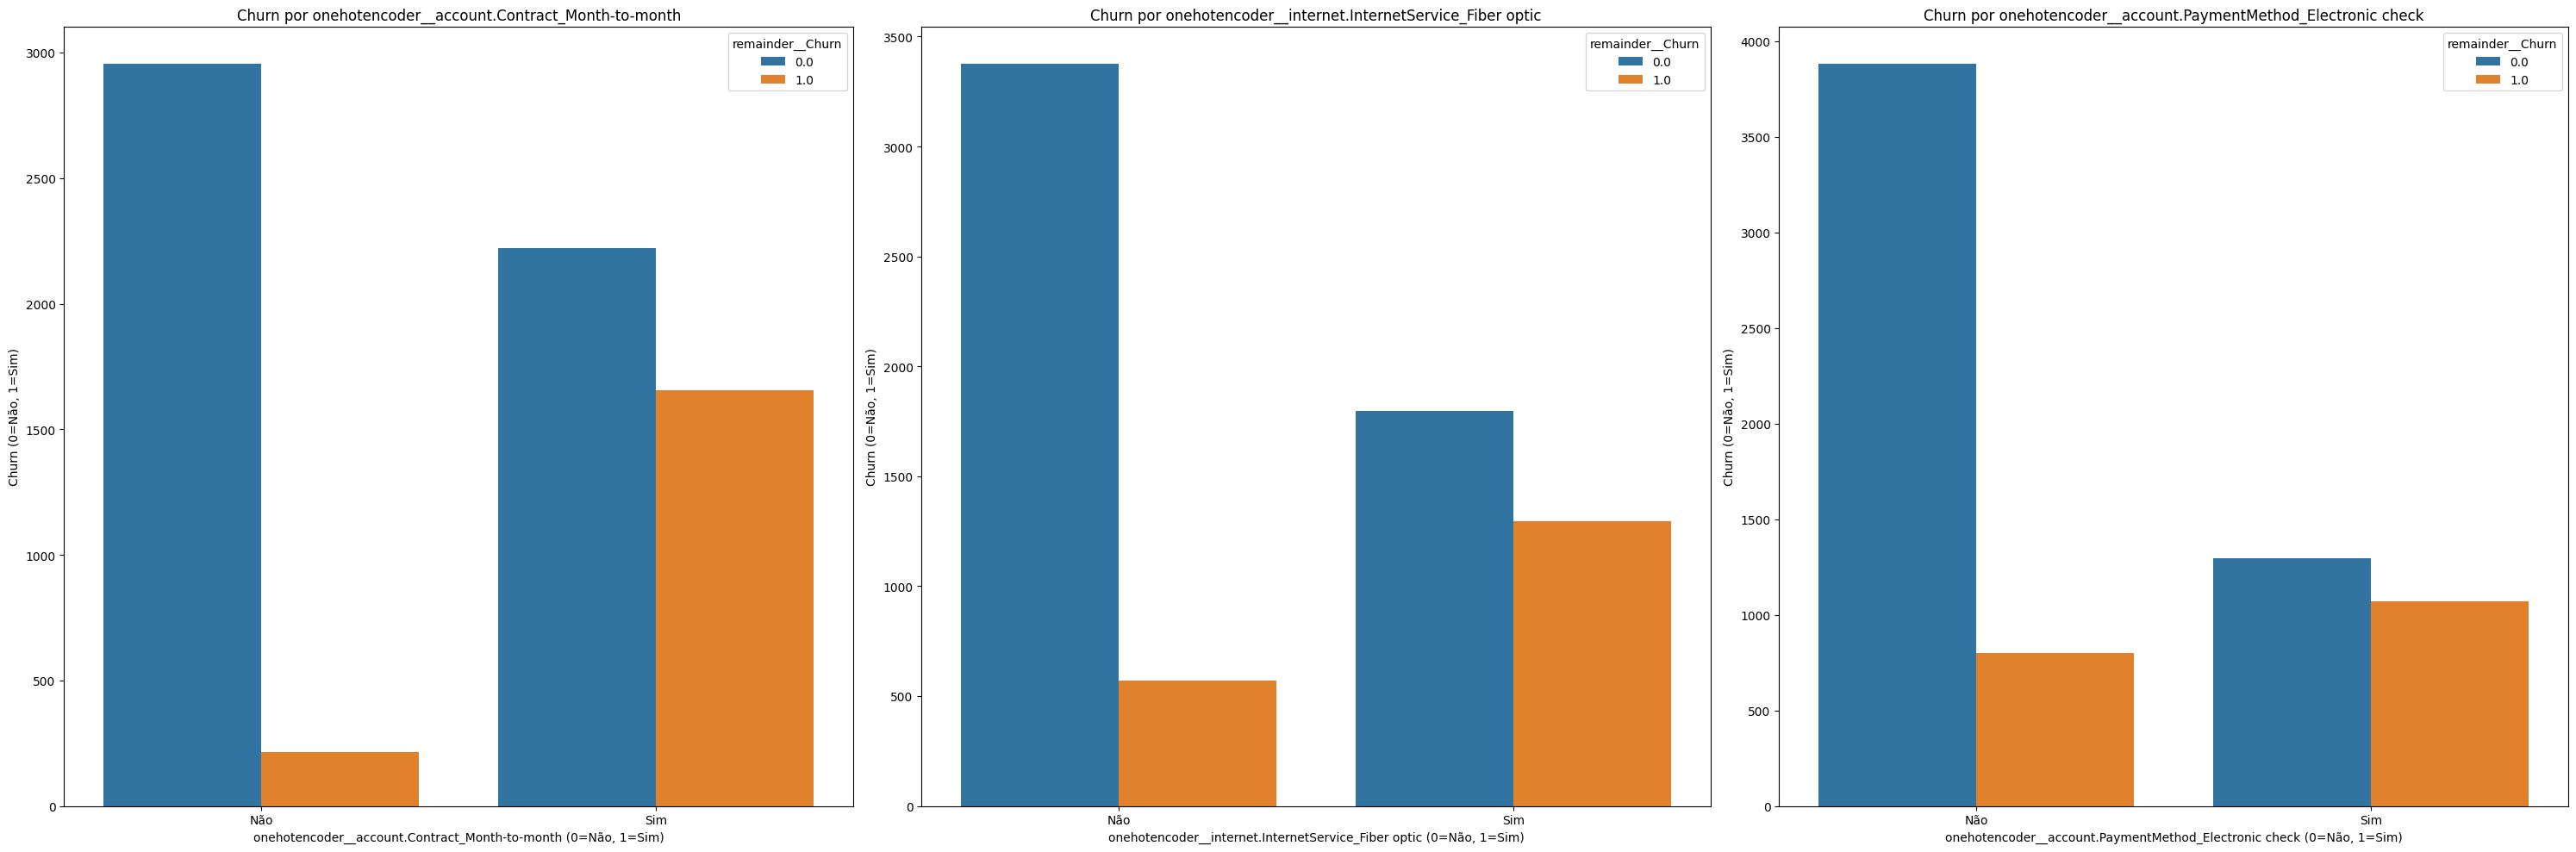

In [115]:
principais_positivos = ['onehotencoder__account.Contract_Month-to-month', 'onehotencoder__internet.InternetService_Fiber optic', 'onehotencoder__account.PaymentMethod_Electronic check']
gerar_grafico_countplot(1,3, principais_positivos)

-- obervações sobre os gráficos --
- no primeiro e segundo gráfico vemos que existe uma relação direta entre clientes que possuem contrato mensal e de fibra ótica indicando que são duas problemáticas reais e significativas
- já no terceiro gráfico vemos que, apesar de a correlação positiva vista anteriorimente, a diferença entre clientes que utilizam ou não o pagamento eletrônico e que optaram pela evasão não é tão descrepante - podendo indicar não ser uma variável TÃO significativa para a análise

In [116]:
principais_negativos = ['remainder__customer.Partner', 'remainder__customer.Dependents',
						 'onehotencoder__internet.InternetService_No', 
						 'onehotencoder__account.Contract_Two year']


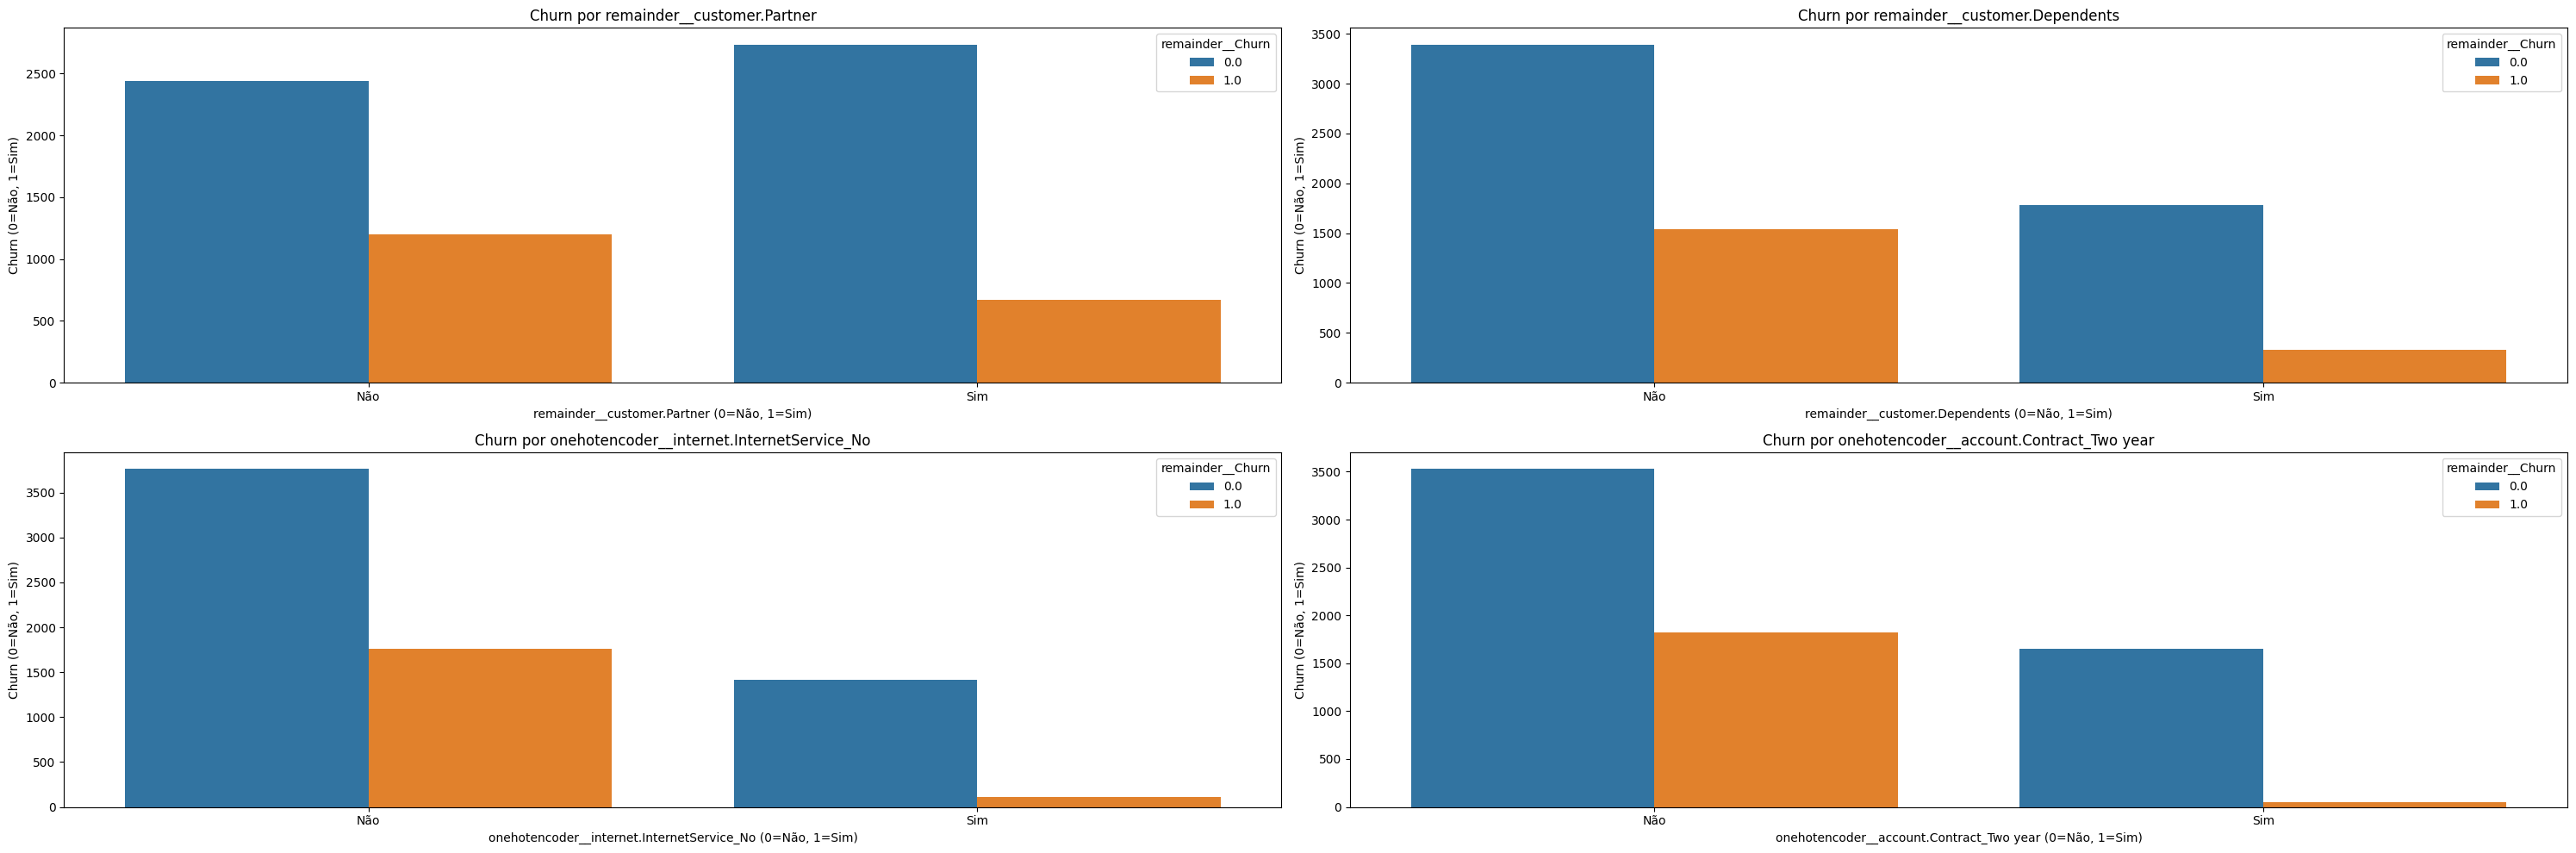

In [117]:
gerar_grafico_countplot(2, 2, principais_negativos)

-- observações sobre os gráficos --
- em todos os gráficos ao analisar que as variáveis possuem de fato uma correlação negativa, ou seja, os clientes que possuem cônjuge, dependentes, que optaram pelo plano anual e não contrataram a internet possuem uma tendência muito menor de adesão a evasão (Churn)

In [118]:
principais_negativos_scatter = ['remainder__account.Charges.Total','remainder__customer.tenure']

In [119]:
def gerar_boxplots(df, colunas_explicativas):
    fig_quant = 1
    fig_por_fig = len(colunas_explicativas)
    fig, axs = plt.subplots(fig_quant, fig_por_fig, figsize=(fig_por_fig * 8, 6))
    if fig_por_fig == 1:
        axs = [axs]
    for i, col in enumerate(colunas_explicativas):
        sns.boxplot(
            x='remainder__Churn',
            y=col,               
            data=df,
            ax=axs[i]
        )
        axs[i].set_title(f'Distribuição de {col} por Churn')
        axs[i].set_xlabel('Churn (0=Não, 1=Sim)')
        axs[i].set_ylabel(col)
        axs[i].set_xticks([0, 1]) 
        axs[i].set_xticklabels(['Não Churn', 'Churn']) 
    plt.tight_layout()
    plt.show()

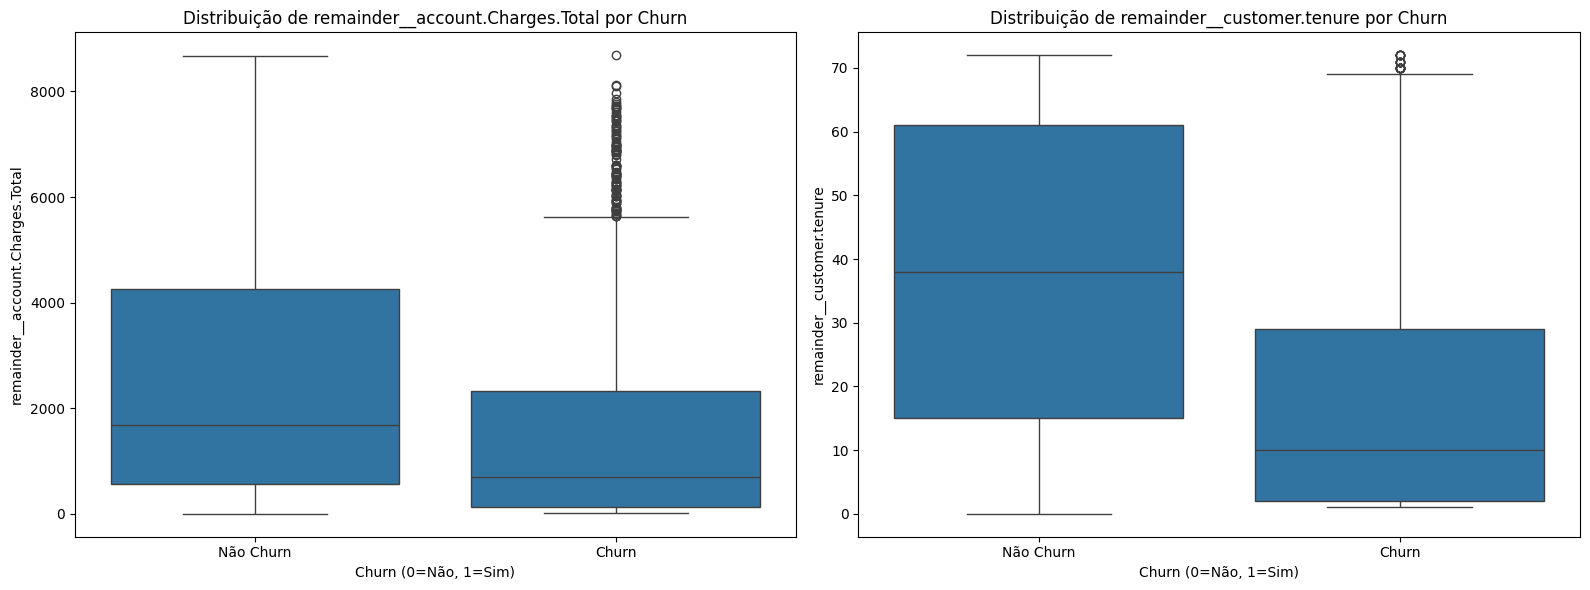

In [120]:
gerar_boxplots(df, principais_negativos_scatter)

-- Considerações sobre o gráfico --

- em charges.Total observamos que clientes que optaram pela evasão, pela mediana, gastaram menos - apesar de observar alguns outliers. Apontando mais uma vez que clientes de longa data costumar continuar com a empresa e/ou que clientes pagando valores maiores estão satisfeitos com o produto oferecido.
- em tenure (tempo que o cliente recebe os serviços) observamos a mesma coisa, porém com uma descrepância muito maior. A mediana de clientes que optaram pela evasão é concentrada em tempos muito mais baixos se comparado a clientes que não optaram pela evasão. Essa distribuição possui uma quantidade insignificante de autliers. Reforçando mais uma vez que a fidelização do cliente.

## Modelagem DummyClassifier

In [121]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy='uniform')  # prevê de forma uniforme
dummy_clf.fit(X_train_res, y_train_res)

y_pred_dummy = dummy_clf.predict(X_test)
acuracia_dummy = accuracy_score(y_test, y_pred_dummy)
print(f"Relatório de Classificação para Dummy Classifier: {acuracia_dummy}\n")

# Relatório de Classificação para Dummy Classifier
print(classification_report(y_test, y_pred_dummy, zero_division=False))

Relatório de Classificação para Dummy Classifier: 0.502129673450071

              precision    recall  f1-score   support

         0.0       0.73      0.52      0.60      1552
         1.0       0.26      0.46      0.33       561

    accuracy                           0.50      2113
   macro avg       0.49      0.49      0.47      2113
weighted avg       0.60      0.50      0.53      2113



## RandomForestClassifier

In [122]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42, max_depth=5) #max_depth para evitar overfitting, controla a profundidade máxima de cada árvore
model_rf.fit(X_train_res, y_train_res)


y_pred_rf = model_rf.predict(X_test)
acuracia_rf = accuracy_score(y_test, y_pred_rf)
print(f"Relatório de Classificação para Random Forest: {acuracia_rf}\n")

# Relatório de classificação para RFC
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação para Random Forest: 0.7567439659252247

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      1552
         1.0       0.53      0.74      0.62       561

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113



## KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# normalização
norm = MinMaxScaler() #redimensiona os dados para um intervalo entre 0 e 1, esse modelo é sensível a isso
x_train_norm = norm.fit_transform(X_train_res)
x_test_norm = norm.transform(X_test)
# lembrando que se o modelo for escolhido, deve ser aplicado o mesmo processo de normalização nos novos dados 

#treinamento modelo knn
knn = KNeighborsClassifier()
knn.fit(x_train_norm, y_train_res)

y_pred_knn = knn.predict(x_test_norm)
acuracia_knn = accuracy_score(y_test, y_pred_knn)
print(f"Relatório de Classificação para KNN: {acuracia_knn}\n")

# Relatório de classificação para KNN
print(classification_report(y_test, y_pred_knn))


Relatório de Classificação para KNN: 0.7359204921911974

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82      1552
         1.0       0.50      0.56      0.53       561

    accuracy                           0.74      2113
   macro avg       0.67      0.68      0.67      2113
weighted avg       0.75      0.74      0.74      2113



## Matriz de confusão 

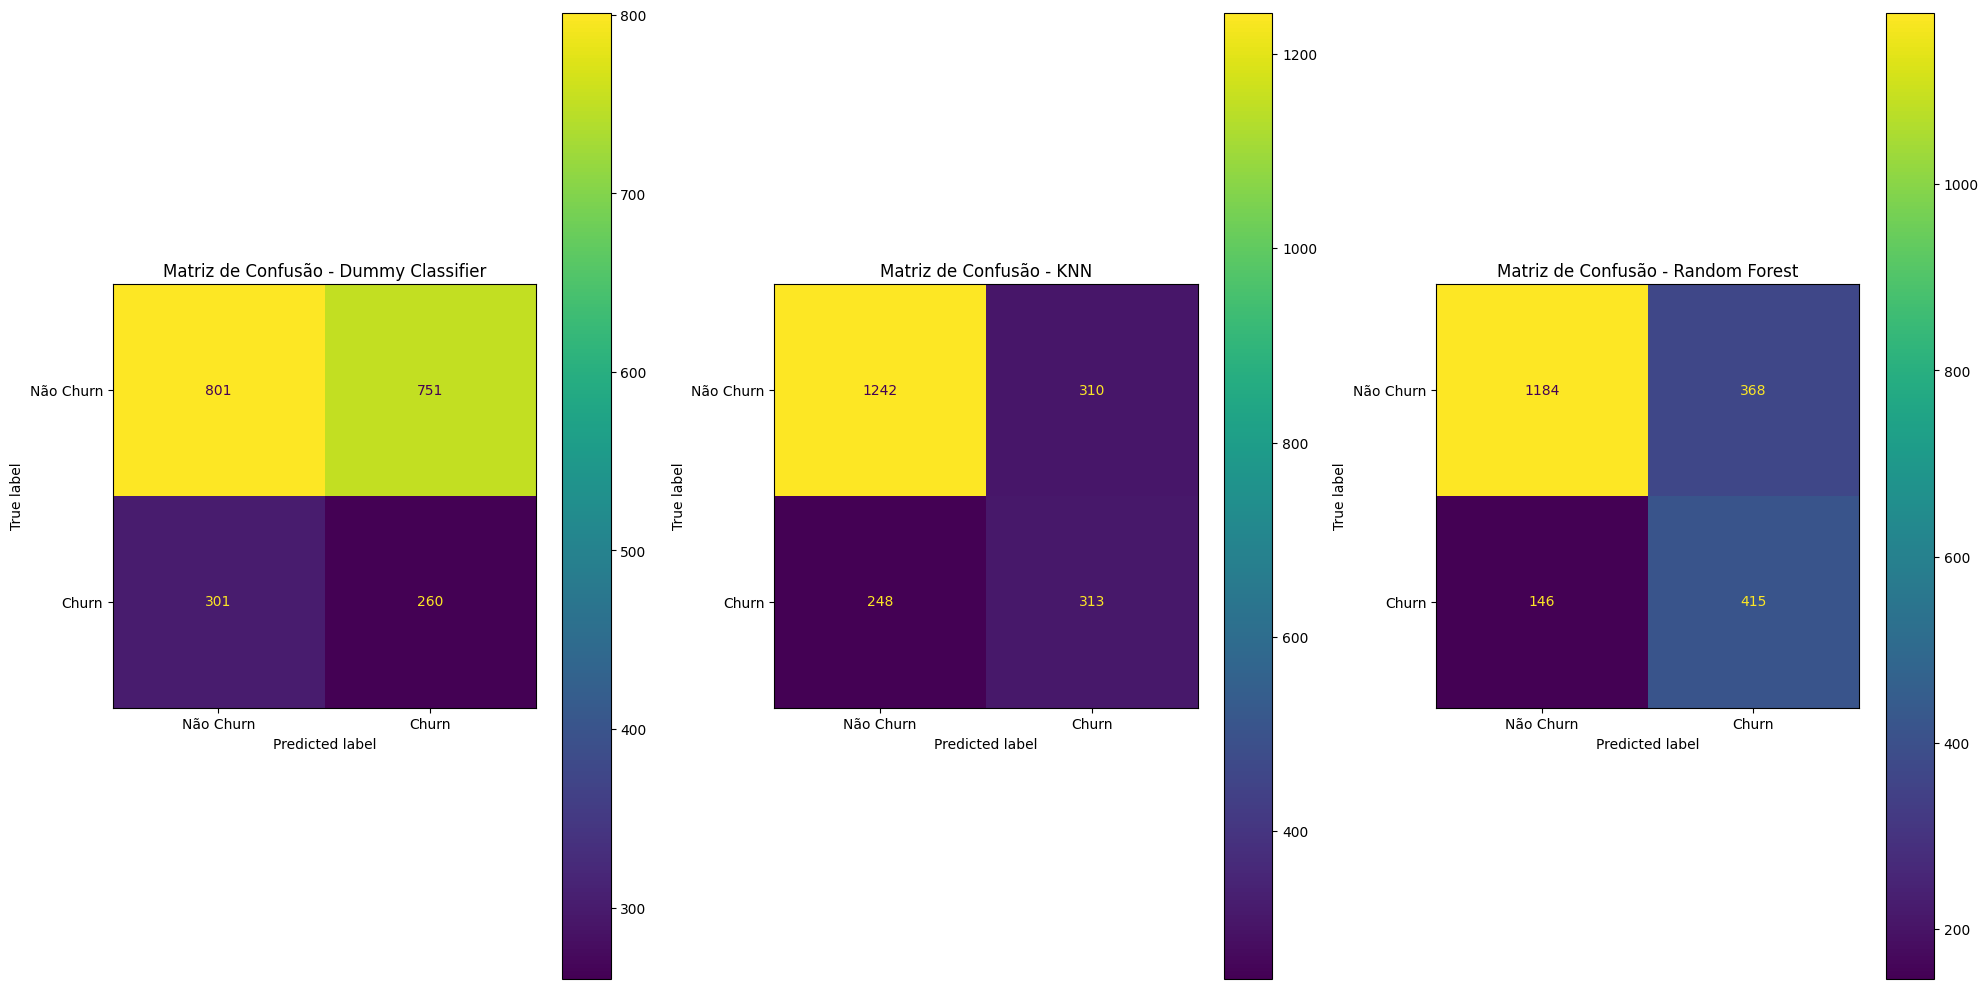

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

matriz_confusao_knn = confusion_matrix(y_test, y_pred_knn)
matriz_confusao_rf = confusion_matrix(y_test, y_pred_rf)
matriz_confusao_dummy = confusion_matrix(y_test, y_pred_dummy)

fig, axs = plt.subplots(1, 3, figsize=(20, 10))  

ConfusionMatrixDisplay(matriz_confusao_dummy, display_labels=['Não Churn', 'Churn']).plot(ax=axs[0])
axs[0].set_title('Matriz de Confusão - Dummy Classifier')

ConfusionMatrixDisplay(matriz_confusao_knn, display_labels=['Não Churn', 'Churn']).plot(ax=axs[1])
axs[1].set_title('Matriz de Confusão - KNN')

ConfusionMatrixDisplay(matriz_confusao_rf, display_labels=['Não Churn', 'Churn']).plot(ax=axs[2])
axs[2].set_title('Matriz de Confusão - Random Forest')

plt.tight_layout()
plt.show()

- a matriz do Dummy mostra que ele acertou 808(0) e 278(1), e errou 283(0) e 744(1), ou seja, é o pior modelo pois mostra ser ineficiente para identificar boa parte dos clientes corretamente
- a matriz do KNN indica que o modelo está acertando mais os zeros(não a evasão - 1242 acertos e 248 erros) e errando muito o um(sim a evasão - 313 acertos e 310 erros), mostrando que o modelo precisa ser refinado
- a matriz RFC por outro lado apresenta resultados um pouco melhor ao identificar os 1(415 acertos e 368 erros), e menos erros e acertos em relação ao 0(1184 acertos e 146 erros)


Optando por descontinuar Dummy

## Verificando Features mais importantes para o RFC

In [125]:
importances_rf = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances_rf})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
3,onehotencoder__account.Contract_Month-to-month,0.223119
8,onehotencoder__account.PaymentMethod_Electroni...,0.195621
5,onehotencoder__account.Contract_Two year,0.107288
14,remainder__customer.tenure,0.092270
1,onehotencoder__internet.InternetService_Fiber ...,0.070205
4,onehotencoder__account.Contract_One year,0.059849
17,remainder__account.Charges.Total,0.054207
13,remainder__customer.Dependents,0.039086
12,remainder__customer.Partner,0.035465
2,onehotencoder__internet.InternetService_No,0.025482


In [126]:

features_rf = RandomForestClassifier(random_state=42, max_depth=5)

#selecionando as 20 principais features com base na importância
selected_features = feature_importances['Features'].values[:10]
X_train_selected = X_train_res[selected_features]
X_test_selected = X_test[selected_features]

features_rf.fit(X_train_selected, y_train_res)

#predict
y_pred_selected_rf = features_rf.predict(X_test_selected)
print(f"Acurácia com Features Selecionadas: {accuracy_score(y_test, y_pred_selected_rf)}\nRelatório de Classificação para Random Forest com Features Selecionadas:\n{classification_report(y_test, y_pred_selected_rf)}")

print(f"Relatório de Classificação para Random Forest SEM as features:\n{classification_report(y_test, y_pred_rf)}")



Acurácia com Features Selecionadas: 0.7207761476573592
Relatório de Classificação para Random Forest com Features Selecionadas:
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79      1552
         1.0       0.48      0.78      0.60       561

    accuracy                           0.72      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.72      0.74      2113

Relatório de Classificação para Random Forest SEM as features:
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      1552
         1.0       0.53      0.74      0.62       561

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113



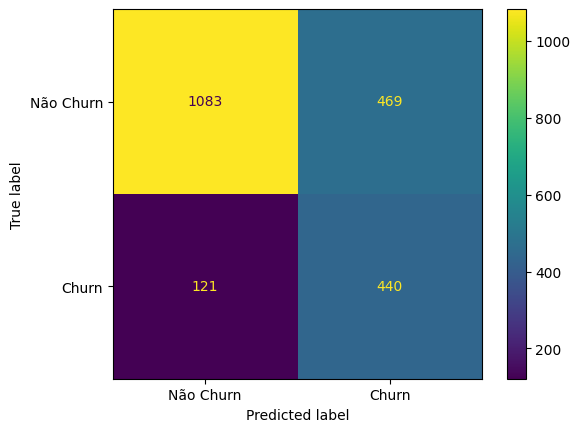

In [127]:
matriz_confusao_rf_selected = confusion_matrix(y_test, y_pred_selected_rf)
ConfusionMatrixDisplay(matriz_confusao_rf_selected, display_labels=['Não Churn', 'Churn']).plot();

- a matriz RFC ANTIGA => 1(415 acertos e 368 erros), e  0(1184 acertos e 146 erros)
- matriz nova => 1(440 acertos e 469 erros | acertou e errou mais), e  0(1083 acertos e 121 erros | acertou e errou menos) 

## Otimização de hiperparâmetros

In [128]:
#KNN
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_res, y_train_res)
print(f"Melhor modelo: {grid.best_estimator_}")

Melhor modelo: KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


In [129]:
#RFC
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

model_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5) 

model_grid.fit(X_train_res, y_train_res)

print(f"Melhor modelo: {model_grid.best_estimator_}")

Melhor modelo: RandomForestClassifier(max_depth=10, n_estimators=50)


## Criando novo modelo com hiperparâmetros + features mais importantes(apenas RFC) e vendo metricas para comparar

In [130]:
# KNN
knn_hiper = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

# RFC
rf_hiper = RandomForestClassifier(max_depth=10, min_samples_split=5)
rf_hiper_e_selected = RandomForestClassifier(max_depth=10, min_samples_split=5)

# Treinando os modelos com os melhores parâmetros
knn_hiper.fit(x_train_norm, y_train_res)
rf_hiper.fit(X_train_res, y_train_res)
rf_hiper_e_selected.fit(X_train_selected, y_train_res)

#predict
y_pred_knn_hiper = knn_hiper.predict(x_test_norm)
y_pred_rf_hiper = rf_hiper.predict(X_test)
y_pred_selected_rf = features_rf.predict(X_test_selected)

print(f"Relatório de Classificação para Random Forest + Hiperparâmetros : {accuracy_score(y_test, y_pred_rf_hiper)}\n")
print(classification_report(y_test, y_pred_rf_hiper))

Relatório de Classificação para Random Forest + Hiperparâmetros : 0.7704685281590156

              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1552
         1.0       0.56      0.65      0.60       561

    accuracy                           0.77      2113
   macro avg       0.71      0.73      0.72      2113
weighted avg       0.78      0.77      0.78      2113



In [131]:
print(f"Relatório de Classificação para Random Forest + Hiperparâmetros + Features: {accuracy_score(y_test, y_pred_selected_rf)}\n")
print(classification_report(y_test, y_pred_selected_rf))

Relatório de Classificação para Random Forest + Hiperparâmetros + Features: 0.7207761476573592

              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79      1552
         1.0       0.48      0.78      0.60       561

    accuracy                           0.72      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.79      0.72      0.74      2113



In [132]:
print(f"Relatório de Classificação para KNN: {accuracy_score(y_test, y_pred_knn_hiper)}\n")
print(classification_report(y_test, y_pred_knn_hiper))


Relatório de Classificação para KNN: 0.7463322290582111

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      1552
         1.0       0.52      0.50      0.51       561

    accuracy                           0.75      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.75      0.74      2113



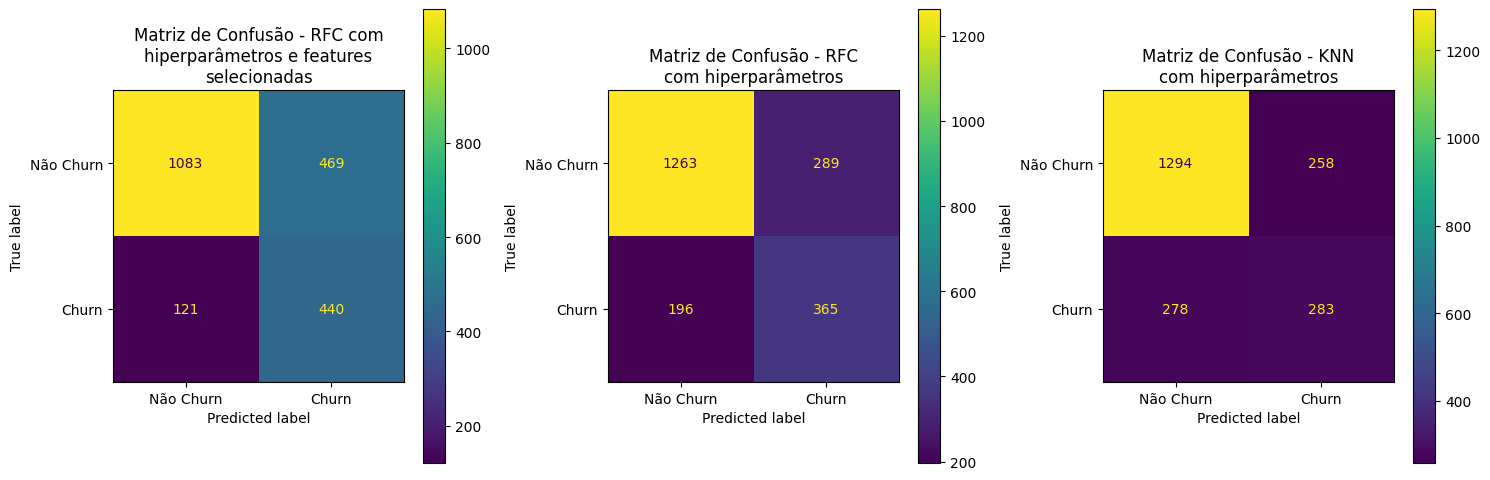

In [133]:
# matriz de confusão para KNN e RFC
matriz_confusao_knn = confusion_matrix(y_test, y_pred_knn_hiper)
matriz_confusao_rf = confusion_matrix(y_test, y_pred_rf_hiper)
matriz_confusao_rf_selected = confusion_matrix(y_test, y_pred_selected_rf)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

ConfusionMatrixDisplay(matriz_confusao_rf_selected, display_labels=['Não Churn', 'Churn']).plot(ax=axs[0])
axs[0].set_title('Matriz de Confusão - RFC com\nhiperparâmetros e features\nselecionadas')

ConfusionMatrixDisplay(matriz_confusao_rf, display_labels=['Não Churn', 'Churn']).plot(ax=axs[1])
axs[1].set_title('Matriz de Confusão - RFC\ncom hiperparâmetros')

ConfusionMatrixDisplay(matriz_confusao_knn, display_labels=['Não Churn', 'Churn']).plot(ax=axs[2])
axs[2].set_title('Matriz de Confusão - KNN\ncom hiperparâmetros')

plt.tight_layout()
plt.show()

RFC com hiperparâmetros e features - 0(1083 acertos, 121 erros) | 1(440 acertos e 469 erros)

RFC com hiperparâmetros - 0(1274 acertos, 191 erros) | 1(370 acertos e 278 erros)

KNN com hiperparâmetros - 0(1294 acertos, 278 erros) | 1(283 acertos e 258 erros)


MÉTRICAS ORIGINAIS:

KNN - 0(1242 acertos, 248 erros) | 1(313 acertos e 310 erros)

RFC - 0(1184 acertos, 146 erros) | 1(415 acertos e 368 erros)

## Relatório 

# Fatores que mais influenciam a evasão

Partindo da análise de correlação e gráficos, destaco os seguintes fatores:

**Fatores com correlação positiva com o churn(quanto maior o valor, maior a evasão)**
- Contrato mensal: clientes com contrato mensal apresentam maior taxa de churn.
- Serviço de fibra óptica: clientes que contratam esse serviço têm maior probabilidade de churn, indicando problemas nesse serviço.
- Pagamento eletrônico: clientes com essa forma de pagamento apresentam uma leve tendência ao churn, porém os gráficos indicam que essa variável não é tão determinante isola.

-----------------------------------------------------------------------------

**Fatores com correlação negativa com a evasão(quanto maior o valor, menor a evasão)**
- Presença de parceiros ou dependentes: clientes com vínculos familiares tendem a manter o serviço.
- Sem internet: clientes que não contratam o serviço de internet tendem a ficar, reforçando que o serviço é um ponto crítico de insatisfação.
- Contrato de 2 anos + tempo de permanência(tenure): ambas demonstram que a fidelização dos clientes está fortemente relacionado com a baixa evasão.

-----------------------------------------------------------------------------

# Avaliação dos modelos de Machine Learning:

**KNN original**
- Acurácia: 74%
- F1-score: 0.53 (churn)
- Observações: Baixo recall e f1-score para evasão, modelo não otimizado.  

**KNN com hiperparâmetros**
- Acurácia: 75%
- F1-score: 0.51 (churn)
- Observações: Leve melhora na acurácia geral, mas ainda fraco para prever churn (classe minoritária).

**Random Forest padrão** 
- Acurácia: 76%
- F1-score: 0.62 (churn)
- Observações: Melhor desempenho geral. Detecta bem a evasão, mesmo sem ajustes.

**RF com hiperparâmetros** 
- Acurácia: 77%
- F1-score: 0.60 (churn)
- Observações: Refinamento melhora ligeiramente recall de churn. Boa performance.

**RF + seleção de features**
- Acurácia: 72%
- F1-score: 0.60 (churn)
- Observações: Pior acurácia geral, mas melhora no recall da classe churn. Perde-se equilíbrio com a retirada de variáveis.

# Considerações finais:
- Random Forest supera o KNN.
- Selecionar apenas as variáveis mais importantes prejudica o modelo, perde contexto.

-----------------------------------------------------------------------------

# Estratégias
- Reformular contratos mensais.
- Melhorar o serviço de internet(principalmente fibra óptica).
- Fidelização de clientes antigos.
- Ofertas personalizadas para famílias.
- Investir em onboarding e retenção inicial.

-----------------------------------------------------------------------------

# Conclusão final

O churn está relacionado principalmente a modelos de contrato, qualidade de serviço de internet e fidelização ao longo do tempo. Com base nas análises e nos modelos, a empresa pode tomar ações preventivas e estratégicas como as citadas acima.

pipreqs /caminho/do/script/ --force
